<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Missing Values**


Estimated time needed: **30** minutes


Data wrangling is the process of cleaning, transforming, and organizing data to make it suitable for analysis. Finding and handling missing values is a crucial step in this process to ensure data accuracy and completeness. In this lab, you will focus exclusively on identifying and handling missing values in the dataset.


## Objectives


After completing this lab, you will be able to:


-   Identify missing values in the dataset.

- Quantify missing values for specific columns.

- Impute missing values using various strategies.


## Hands on Lab


##### Setup: Install Required Libraries


In [5]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

##### Import Necessary Modules:


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Tasks


<h2>1. Load the Dataset</h2>
<p>
We use the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:



In [7]:
# Define the URL of the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

### 2. Explore the Dataset
##### Task 1: Display basic information and summary statistics of the dataset.


In [8]:
## ---- Task 1: Display Basic Information and Summary Statistics ---- ##
print("\n🔍 Dataset Information:\n")
print(df.info())  # Display column info and data types

print("\n📊 Summary Statistics:\n")
print(df.describe(include='all'))  # Include all data types (numerical & categorical)

print("\n📏 Shape of Dataset:", df.shape)  # Display number of rows and columns


🔍 Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB
None

📊 Summary Statistics:

          ResponseId                      MainBranch              Age  \
count   65437.000000                           65437            65437   
unique           NaN                               5                8   
top              NaN  I am a developer by profession  25-34 years old   
freq             NaN                           50207            23911   
mean    32719.000000                             NaN              NaN   
std     18890.179119                             NaN              NaN   
min         1.000000                             NaN              NaN   
25%     16360.000000                             NaN              NaN   
50%     32719.000000                             NaN              NaN   
75%     49078.000000           

### 3. Finding Missing Values
##### Task 2: Identify missing values for all columns.


In [9]:
## ---- Task 2: Identify Missing Values ---- ##
print("\n🛑 Missing Values Count per Column:\n")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])  # Show only columns with missing values

print("\n📊 Percentage of Missing Values:\n")
print((df.isnull().sum() / len(df)) * 100)  # Show percentage of missing values


🛑 Missing Values Count per Column:

RemoteWork             10631
CodingActivities       10971
EdLevel                 4653
LearnCode               4949
LearnCodeOnline        16200
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 109, dtype: int64

📊 Percentage of Missing Values:

ResponseId              0.000000
MainBranch              0.000000
Age                     0.000000
Employment              0.000000
RemoteWork             16.246160
                         ...    
JobSatPoints_11        55.002522
SurveyLength           14.143375
SurveyEase             14.057796
ConvertedCompYearly    64.186928
JobSat                 55.490013
Length: 114, dtype: float64


##### Task 3: Visualize missing values using a heatmap (Using seaborn library).



/opt/conda/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


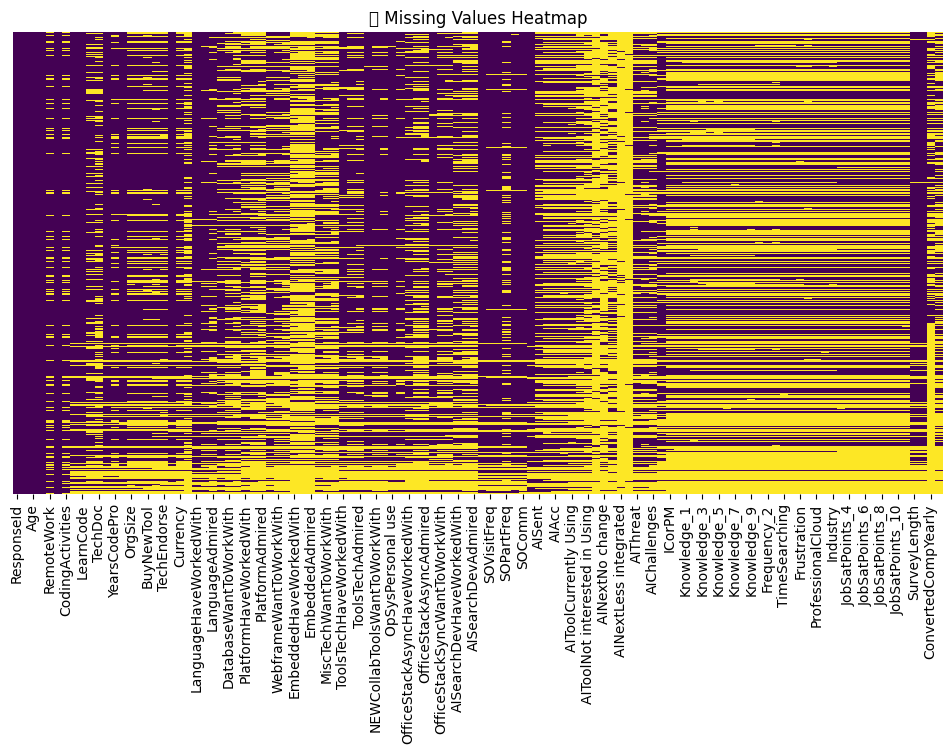

In [17]:
plt.rcParams['font.family'] = 'DejaVu Sans'  # Set font to DejaVu Sans

plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('🔍 Missing Values Heatmap')  # Keep emoji, might work
plt.show()

##### Task 4: Count the number of missing rows for a specific column (e.g., `Employment`).


In [18]:
# Count the number of missing values in the 'Employment' column
missing_employment = df['Employment'].isnull().sum()

# Display the result
print(f"Number of missing rows in 'Employment': {missing_employment}")

Number of missing rows in 'Employment': 0


### 4. Imputing Missing Values
##### Task 5: Identify the most frequent (majority) value in a specific column (e.g., `Employment`).


In [19]:
# Find the most frequent (majority) value in the 'Employment' column
most_frequent_employment = df['Employment'].mode()[0]

# Display the most frequent value
print(f"Most frequent value in 'Employment': {most_frequent_employment}")


Most frequent value in 'Employment': Employed, full-time


##### Task 6: Impute missing values in the `Employment` column with the most frequent value.



In [21]:
# Impute missing values in 'Employment' with the most frequent value
df['Employment'] = df['Employment'].fillna(most_frequent_employment)

# Verify if missing values are removed
missing_employment_after = df['Employment'].isnull().sum()
print(f"Missing rows in 'Employment' after imputation: {missing_employment_after}")



Missing rows in 'Employment' after imputation: 0


### 5. Visualizing Imputed Data
##### Task 7: Visualize the distribution of a column after imputation (e.g., `Employment`).


AttributeError: 'NoneType' object has no attribute 'remove'

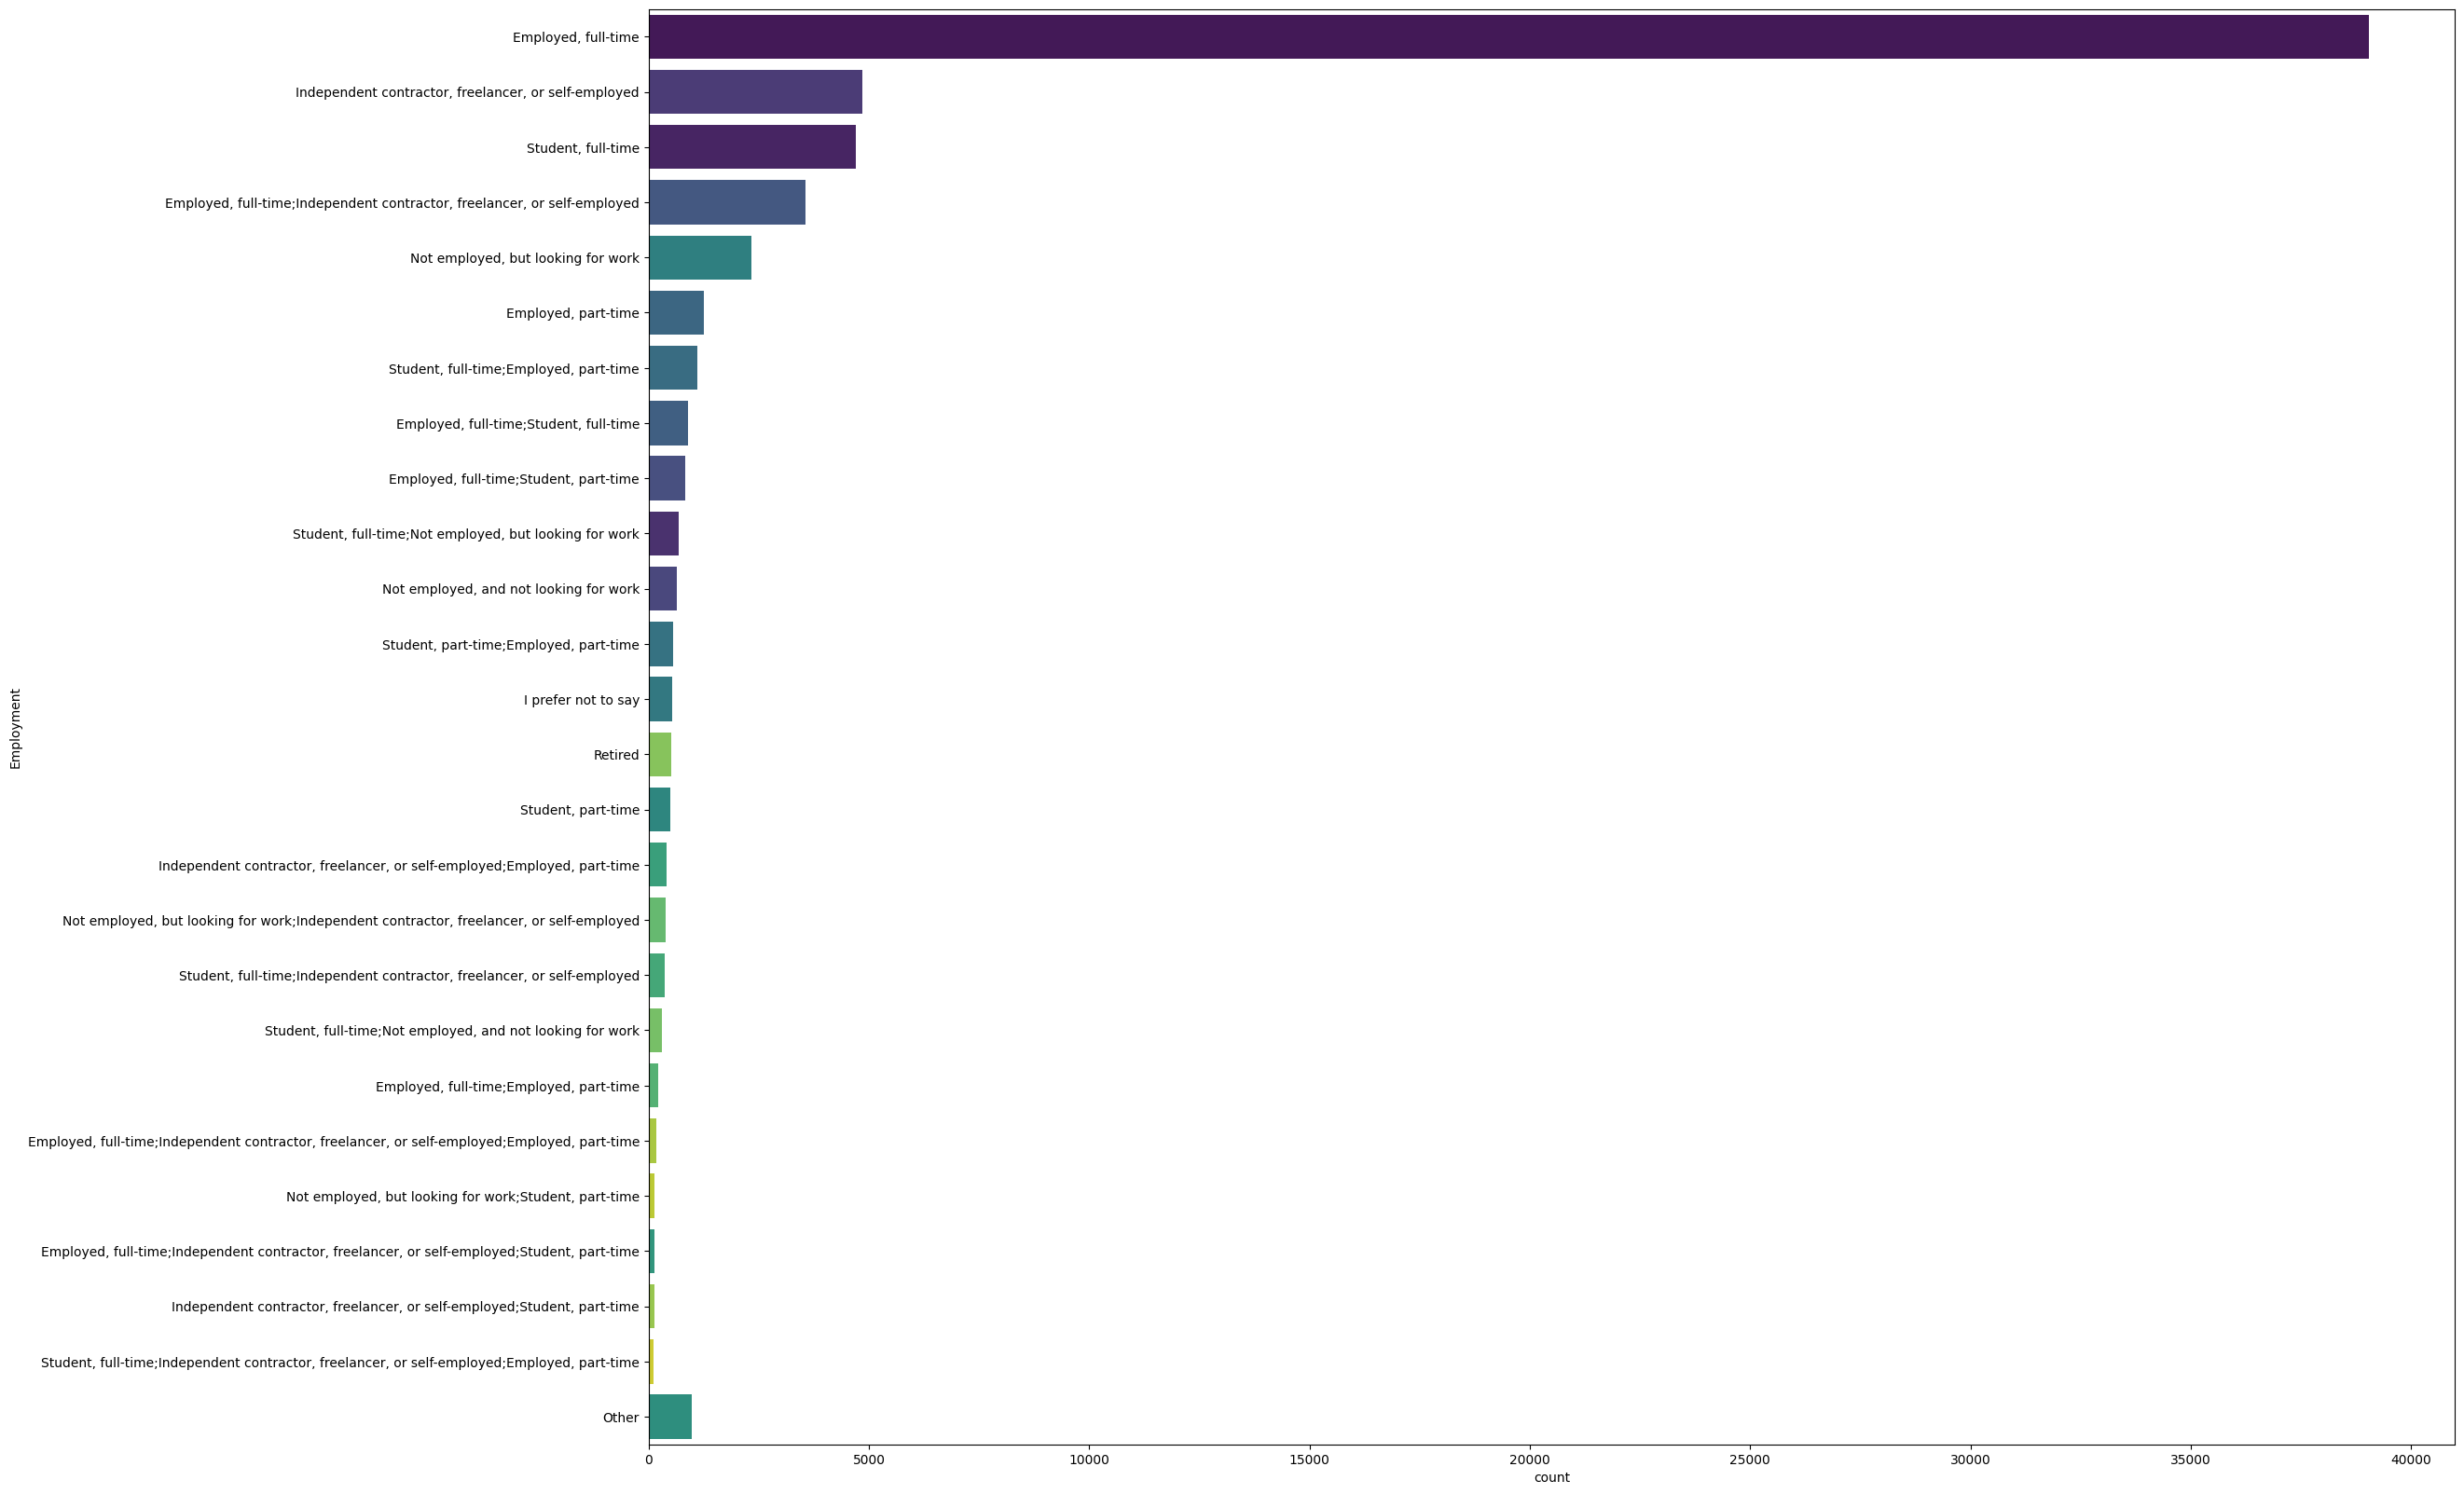

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the frequency of each Employment category
employment_counts = df['Employment'].value_counts()

# Identify categories with fewer than 100 occurrences
low_frequency_categories = employment_counts[employment_counts < 100].index

# Sum the values of the low-frequency categories
other_count = employment_counts[low_frequency_categories].sum()

# Replace low-frequency categories with 'Other'
df['Employment'] = df['Employment'].replace(low_frequency_categories, 'Other')

# Recalculate employment counts after replacement
employment_counts = df['Employment'].value_counts()

# Add the summed value of the 'Other' category
employment_counts['Other'] = other_count

# Drop the individual low-frequency categories that were merged into 'Other'
employment_counts = employment_counts.drop(low_frequency_categories)

# Plot a bar chart of Employment distribution with switched axes and more space between bars
plt.figure(figsize=(25, 20))  # Increased height (25, 20) for more space

# Create a countplot with adjusted height for the bars, sorted in descending order
ax = sns.countplot(data=df, y='Employment', palette="viridis", order=employment_counts.sort_values(ascending=False).index, hue='Employment')

# Set the legend to False to avoid the FutureWarning
ax.legend_.remove()

# Add labels and title
plt.title("Employment Distribution After Compiling Low Frequency Categories as 'Other'")
plt.ylabel("Employment Type")
plt.xlabel("Count")

# Adjust the spacing between the Y-axis labels and bars
plt.subplots_adjust(left=0.15, right=0.85, top=0.9, bottom=0.05)  # Adjusted for better space distribution

# Show the plot
plt.show()




### Summary


In this lab, you:
- Loaded the dataset into a pandas DataFrame.
- Identified missing values across all columns.
- Quantified missing values in specific columns.
- Imputed missing values in a categorical column using the most frequent value.
- Visualized the imputed data for better understanding.
  


Copyright © IBM Corporation. All rights reserved.
